In [1]:
from z3 import *
Tie, Shirt = Bools('Tie Shirt')
s = Solver()
s.add(Or(Tie, Shirt), 
      Or(Not(Tie), Shirt), 
      Or(Not(Tie), Not(Shirt)))
print(s.check())
print(s.model())

sat
[Tie = False, Shirt = True]


In [20]:
Z = IntSort()
f = Function('f', Z, Z)
x, y, z = Ints('x y z')
A = Array('A', Z, Z)
fml = Implies(x + 2 == y, f(Store(A, x, 3)[y - 2]) == f(y - x + 1))
solve(fml)

[A = K(Int, 2), y = 0, x = -3]


In [21]:
from z3 import *
x, y = Ints('x y')
s = Solver()
s.add((x % 4) + 3 * (y / 2) > x - y)
print(s.sexpr())

(declare-fun y () Int)
(declare-fun x () Int)
(assert (> (+ (mod x 4) (* 3 (div y 2))) (- x y)))



In [22]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

[y = 0, x = 7]


In [23]:
x = Int('x')
y = Int('y')
print (simplify(x + y + 2*x + 3))
print (simplify(x < y + x + 2))
print (simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

3 + 3*x + y
Not(y <= -2)
And(x >= 2, 2*x**2 + y**2 >= 3)


In [24]:
x = Int('x')
y = Int('y')
n = x + y >= 3
print ("num args: ", n.num_args())
print ("children: ", n.children())
print ("1st child:", n.arg(0))
print ("2nd child:", n.arg(1))
print ("operator: ", n.decl())
print ("op name:  ", n.decl().name())

num args:  2
children:  [x + y, 3]
1st child: x + y
2nd child: 3
operator:  >=
op name:   >=


In [25]:
x = Real('x')
y = Real('y')
solve(x**2 + y**2 > 3, x**3 + y < 5)

[y = 2, x = 1/8]


In [26]:
print (1/3)
print (RealVal(1)/3)
print (Q(1,3))

x = Real('x')
print (x + 1/3)
print (x + Q(1,3))
print (x + "1/3")
print (x + 0.25)

0.3333333333333333
1/3
1/3
x + 3333333333333333/10000000000000000
x + 1/3
x + 1/3
x + 1/4


In [27]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))

[q = False, p = False, r = True]


In [28]:
p = Bool('p')
x = Real('x')
solve(Or(x < 5, x > 10), Or(p, x**2 == 2), Not(p))

[x = -1.4142135623?, p = False]


In [29]:
X = [ [ Int(f"x_{i+1}_{j+1}") for j in range(9) ] for i in range(9) ]
X

[[x_1_1, x_1_2, x_1_3, x_1_4, x_1_5, x_1_6, x_1_7, x_1_8, x_1_9],
 [x_2_1, x_2_2, x_2_3, x_2_4, x_2_5, x_2_6, x_2_7, x_2_8, x_2_9],
 [x_3_1, x_3_2, x_3_3, x_3_4, x_3_5, x_3_6, x_3_7, x_3_8, x_3_9],
 [x_4_1, x_4_2, x_4_3, x_4_4, x_4_5, x_4_6, x_4_7, x_4_8, x_4_9],
 [x_5_1, x_5_2, x_5_3, x_5_4, x_5_5, x_5_6, x_5_7, x_5_8, x_5_9],
 [x_6_1, x_6_2, x_6_3, x_6_4, x_6_5, x_6_6, x_6_7, x_6_8, x_6_9],
 [x_7_1, x_7_2, x_7_3, x_7_4, x_7_5, x_7_6, x_7_7, x_7_8, x_7_9],
 [x_8_1, x_8_2, x_8_3, x_8_4, x_8_5, x_8_6, x_8_7, x_8_8, x_8_9],
 [x_9_1, x_9_2, x_9_3, x_9_4, x_9_5, x_9_6, x_9_7, x_9_8, x_9_9]]

In [30]:
# 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9) for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ]) for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j] for i in range(3) for j in range(3) ]) for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

In [31]:
# sudoku instance, we use '0' for empty cells
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0, True, X[i][j] == instance[i][j]) for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ] for i in range(9) ]
    print_matrix(r)
else:
    print ("failed to solve")

[[7, 1, 5, 8, 9, 4, 6, 3, 2],
 [2, 3, 4, 5, 1, 6, 8, 9, 7],
 [6, 8, 9, 7, 2, 3, 1, 4, 5],
 [4, 9, 3, 6, 5, 7, 2, 1, 8],
 [8, 6, 7, 2, 3, 1, 9, 5, 4],
 [1, 5, 2, 4, 8, 9, 7, 6, 3],
 [3, 7, 6, 1, 4, 8, 5, 2, 9],
 [9, 2, 8, 3, 6, 5, 4, 7, 1],
 [5, 4, 1, 9, 7, 2, 3, 8, 6]]


# Fitting Rectangle

In [45]:
Width = 100
Height = 100
w = [Int(f'w{i}') for i in range(4)]
h = [Int(f'h{i}') for i in range(4)]
W = [20,40,60,30]
H = [20,70,80,20]
Form = [Or(And(w[i]==W[i],h[i]==H[i]), And(w[i]==H[i],h[i]==W[i])) for i in range(4)]

x = [Int(f'x{i}') for i in range(4)]
y = [Int(f'y{i}') for i in range(4)]
IN = [And(x[i]>=0,x[i]+w[i]<=Width,y[i]>=0,y[i]+h[i]<=Height) for i in range(4)]

Overlap = []
for i,j in [(m,k) for m in range(4) for k in range(4) if m < k]:
    Overlap = Overlap + [Or(x[i]+w[i]<=x[j],x[j]+w[j]<=x[i],y[i]+h[i]<=y[j],y[j]+h[j]<=y[i])]
s = Solver()
s.add(Form + IN + Overlap)
print(s)
print('---------------------------')
#solve(Form + IN + Overlap)
s.check()
m = s.model()
print(m)

[Or(And(w0 == 20, h0 == 20), And(w0 == 20, h0 == 20)),
 Or(And(w1 == 40, h1 == 70), And(w1 == 70, h1 == 40)),
 Or(And(w2 == 60, h2 == 80), And(w2 == 80, h2 == 60)),
 Or(And(w3 == 30, h3 == 20), And(w3 == 20, h3 == 30)),
 And(x0 >= 0, x0 + w0 <= 100, y0 >= 0, y0 + h0 <= 100),
 And(x1 >= 0, x1 + w1 <= 100, y1 >= 0, y1 + h1 <= 100),
 And(x2 >= 0, x2 + w2 <= 100, y2 >= 0, y2 + h2 <= 100),
 And(x3 >= 0, x3 + w3 <= 100, y3 >= 0, y3 + h3 <= 100),
 Or(x0 + w0 <= x1,
    x1 + w1 <= x0,
    y0 + h0 <= y1,
    y1 + h1 <= y0),
 Or(x0 + w0 <= x2,
    x2 + w2 <= x0,
    y0 + h0 <= y2,
    y2 + h2 <= y0),
 Or(x0 + w0 <= x3,
    x3 + w3 <= x0,
    y0 + h0 <= y3,
    y3 + h3 <= y0),
 Or(x1 + w1 <= x2,
    x2 + w2 <= x1,
    y1 + h1 <= y2,
    y2 + h2 <= y1),
 Or(x1 + w1 <= x3,
    x3 + w3 <= x1,
    y1 + h1 <= y3,
    y3 + h3 <= y1),
 Or(x2 + w2 <= x3,
    x3 + w3 <= x2,
    y2 + h2 <= y3,
    y3 + h3 <= y2)]
---------------------------
[w3 = 20,
 w1 = 70,
 y1 = 0,
 h1 = 40,
 y0 = 20,
 h3 = 30,
 x2 = 0

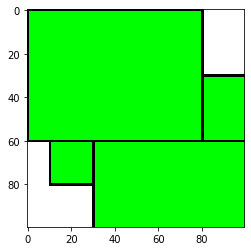

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = np.zeros([Width,Height,3],dtype=np.uint8)
img.fill(255)
for i in range(4):
    X = m[x[i]].as_long()
    Y = m[y[i]].as_long()
    W = m[w[i]].as_long()
    H = m[h[i]].as_long()
    cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,255,0),-1)
    cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,0,0),1)
    
plt.imshow(img)

In [16]:
plt.imsave('rect.jpg',img)

In [17]:
# Z3: finding all satisfying models
a = Int('a')
b = Int('b')

s = Solver()
s.add(1 <= a)
s.add(a <= 20)
s.add(1 <= b)
s.add(b <= 20)
s.add(a >= 2*b)

while s.check() == sat:
    print (s.model())
    s.add(Or(a != s.model()[a], b != s.model()[b])) # prevent next model from using the same assignment as a previous model

[b = 1, a = 2]
[b = 2, a = 4]
[b = 1, a = 3]
[b = 3, a = 6]
[b = 2, a = 7]
[b = 2, a = 8]
[b = 2, a = 9]
[b = 2, a = 10]
[b = 2, a = 11]
[b = 2, a = 12]
[b = 2, a = 13]
[b = 2, a = 14]
[b = 2, a = 15]
[b = 2, a = 16]
[b = 2, a = 17]
[b = 2, a = 18]
[b = 2, a = 19]
[b = 2, a = 20]
[b = 4, a = 20]
[b = 5, a = 20]
[b = 6, a = 20]
[b = 7, a = 20]
[b = 8, a = 20]
[b = 9, a = 20]
[b = 10, a = 20]
[b = 9, a = 19]
[b = 9, a = 18]
[b = 8, a = 17]
[b = 8, a = 16]
[b = 5, a = 16]
[b = 6, a = 16]
[b = 6, a = 15]
[b = 6, a = 14]
[b = 6, a = 13]
[b = 6, a = 12]
[b = 6, a = 17]
[b = 5, a = 17]
[b = 3, a = 17]
[b = 4, a = 17]
[b = 1, a = 17]
[b = 7, a = 17]
[b = 4, a = 18]
[b = 4, a = 19]
[b = 3, a = 20]
[b = 1, a = 20]
[b = 7, a = 19]
[b = 7, a = 18]
[b = 7, a = 16]
[b = 7, a = 15]
[b = 7, a = 14]
[b = 8, a = 19]
[b = 8, a = 18]
[b = 5, a = 10]
[b = 5, a = 11]
[b = 3, a = 11]
[b = 3, a = 8]
[b = 3, a = 9]
[b = 3, a = 7]
[b = 3, a = 10]
[b = 1, a = 8]
[b = 1, a = 7]
[b = 1, a = 6]
[b = 1, a = 5]
[b = 

In [39]:
for m,k in [(i,j) for i in range(4) for j in range(4) if i < j]:
    print(m,k)

0 1
0 2
0 3
1 2
1 3
2 3


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
def Fitt_rect(FW,FH,width,height):
    Width = FW
    Height = FH
    W = width
    H = height
    n = len(W)
    w = [Int(f'w{i}') for i in range(n)]
    h = [Int(f'h{i}') for i in range(n)]
    Form = [Or(And(w[i]==W[i],h[i]==H[i]),
               And(w[i]==H[i],h[i]==W[i])) for i in range(n)]

    x = [Int(f'x{i}') for i in range(n)]
    y = [Int(f'y{i}') for i in range(n)]
    IN = [And(x[i]>=0,x[i]+w[i]<=Width,y[i]>=0,y[i]+h[i]<=Height) for i in range(n)]

    Overlap = []
    for i,j in [(m,k) for m in range(n) for k in range(n) if m < k]:
        Overlap = Overlap + [Or(x[i]+w[i]<=x[j],x[j]+w[j]<=x[i],y[i]+h[i]<=y[j],y[j]+h[j]<=y[i])]
        
    s = Solver()
    s.add(Form + IN + Overlap)
    s.check()
    m = s.model()
    img = np.zeros([Width,Height,3],dtype=np.uint8)
    img.fill(255)
    for i in range(n):
        X = m[x[i]].as_long()
        Y = m[y[i]].as_long()
        W = m[w[i]].as_long()
        H = m[h[i]].as_long()
        cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,255,0),-1)
        cv2.rectangle(img,(X,100-Y),((X+W),100-(Y+H)),(0,0,0),1)

    plt.imshow(img)

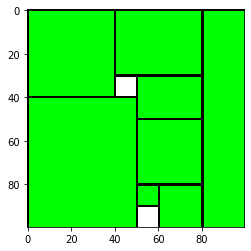

In [28]:
w = [10,20,30,40,20,40,50,30]
l = [10,20,30,40,100,30,60,20]
Fitt_rect(100,100,w,l)

# Truck

In [11]:
from z3 import *

In [12]:
Truck = [Int(f't{i}') for i in range(8)]
n = [Int(f'n{i}') for i in range(8)]
p = [Int(f'p{i}') for i in range(8)]
s = [Int(f's{i}') for i in range(8)]
c = [Int(f'c{i}') for i in range(8)]
d = [Int(f'd{i}') for i in range(8)]

A = [And(Truck[i]==800*n[i]+1100*p[i]+1000*s[i]+2500*c[i]+200*d[i], n[i]+p[i]+s[i]+c[i]+d[i]<=8, Truck[i]<=8000, Or(p[i]==0,c[i]==0)) for i in range(8)]
var = [n,s,c,d]
num = [4,8,10,20]
B = [sum(i)==j for i,j in zip(var,num)]+[sum(p)<=22]
C = [s[i]==0 for i in range(8)[3:]]+[n[i]<2 for i in range(8)]
D = [i[j]>=0 for  i in var for j in range(8)] + [p[i]>=0 for i in range(8)]


In [13]:
opt = Optimize()
opt.add(A+B+C+D)
obj1 = opt.maximize(sum(p))
opt.check()
m = opt.model()

In [14]:
print("Max(p): " + str(obj1.value()))

Max(p): 19


# Sudoku

In [1]:
from z3 import *

In [2]:
# 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9) for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ]) for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j] for i in range(3) for j in range(3) ]) for i0 in range(3) for j0 in range(3) ]


In [3]:
consecutive_row = [(1,2),(1,4),(1,7),(3,2),(3,4),(3,5),(5,1),(5,2),(5,4),(5,6),(5,8),(6,3),(7,3),(8,6)]
consecutive_col = [(4,3),(6,3),(6,4),(1,6),(6,6),(2,7),(3,7),(4,7),(6,7),(3,9),(4,9)]
Left = [(2,i) for i in range(4,9)]+[(4,i) for i in range(1,6)]+[(6,i) for i in range(4,9)]+[(8,i) for i in range(1,6)]

In [4]:
def abs(x):
    return If(x >= 0, x, -x)

In [5]:
Cond1 = [abs(X[i-1][j-1] - X[i-1][j])==1 for i,j in consecutive_row]
Cond2 = [abs(X[i-1][j-1] - X[i][j-1])==1 for i,j in consecutive_col]
Cond3 = [X[i-1][j-1] < X[i-1][j] for i,j in Left]

In [6]:
Cond3

[x_2_4 < x_2_5,
 x_2_5 < x_2_6,
 x_2_6 < x_2_7,
 x_2_7 < x_2_8,
 x_2_8 < x_2_9,
 x_4_1 < x_4_2,
 x_4_2 < x_4_3,
 x_4_3 < x_4_4,
 x_4_4 < x_4_5,
 x_4_5 < x_4_6,
 x_6_4 < x_6_5,
 x_6_5 < x_6_6,
 x_6_6 < x_6_7,
 x_6_7 < x_6_8,
 x_6_8 < x_6_9,
 x_8_1 < x_8_2,
 x_8_2 < x_8_3,
 x_8_3 < x_8_4,
 x_8_4 < x_8_5,
 x_8_5 < x_8_6]

In [7]:
sudoku_c = cells_c + rows_c + cols_c + sq_c + Cond1 + Cond2 + Cond3

In [8]:
s = Solver()
s.add(sudoku_c)
if s.check() == sat:
    m = s.model()
    #r = [ [ m.evaluate(X[i][j]) for j in range(9) ] for i in range(9) ]
    r = [ [ m[X[i][j]] for j in range(9) ] for i in range(9) ]
    print_matrix(r)
else:
    print ("failed to solve")

[[7, 4, 5, 8, 9, 3, 1, 2, 6],
 [3, 6, 9, 1, 2, 4, 5, 7, 8],
 [8, 2, 1, 5, 6, 7, 4, 9, 3],
 [2, 5, 6, 7, 8, 9, 3, 1, 4],
 [9, 8, 7, 4, 3, 1, 2, 6, 5],
 [4, 1, 3, 2, 5, 6, 7, 8, 9],
 [6, 9, 2, 3, 1, 5, 8, 4, 7],
 [1, 3, 4, 6, 7, 8, 9, 5, 2],
 [5, 7, 8, 9, 4, 2, 6, 3, 1]]


# Schedule Job

In [1]:
from itertools import combinations
from z3 import *

In [2]:
C = [2,3,4]
C = list(combinations(C,2))
print(C)

[(2, 3), (2, 4), (3, 4)]


In [3]:
s = [Int(f's{i+1}') for i in range(10)]
e = [Int(f'e{i+1}') for i in range(10)]
j = [i+11 for i in range(10)]

In [4]:
T = Int('T')
J = [(3,1,2),(6,2,4),(8,3,6),(9,6,7),(10,8,9)]
Cond1 = [e[i]-s[i]==j[i] for i in range(10)]
Cond2 = [And(s[i-1]>=e[j-1],s[i-1]>=e[k-1]) for i,j,k in J]+[And(s[6]>=e[0],s[6]>=e[3],s[6]>=e[4])]
Cond3 = [T>=e[i] for i in range(10)]
Cond4 = [And(s[i]>=0,e[i]>=0) for i in range(10)]
Cond5 = [s[6]>=s[7]]
Cond6 = [Or(s[i]>=e[j],s[j]>=e[i]) for i,j in C]

In [10]:
opt = Optimize()
opt.add(Cond1+Cond2+Cond3+Cond4+Cond5+Cond6)
obj1 = opt.minimize(T)
opt.check()
m = opt.model()
print("Min(T): " + str(obj1.value()))

Min(T): 98


In [6]:
print([m.evaluate(s[i]) for i in range(10)])

[0, 0, 12, 0, 15, 14, 30, 30, 47, 66]


In [7]:
print([m.evaluate(e[i]) for i in range(10)])

[11, 12, 25, 14, 30, 30, 47, 48, 66, 86]


# Bounded Model Checking

In [1]:
from z3 import *

In [5]:
index = 0
def fresh(s):
    global index
    index += 1
    return Const("!f%d" % index, s)

def zipp(xs, ys):
    return [p for p in zip(xs, ys)]

def bmc(init, trans, goal, fvs, xs, xns):
    s = Solver()
    s.add(init)
    count = 0
    while True:
        print("iteration ", count)
        count += 1
        p = fresh(BoolSort())
        s.add(Implies(p, goal))
        if sat == s.check(p):
            print (s.model())
            return
        s.add(trans)
        ys = [fresh(x.sort()) for x in xs]
        nfvs = [fresh(x.sort()) for x in fvs]
        trans = substitute(trans, 
                           zipp(xns + xs + fvs, ys + xns + nfvs))
        goal = substitute(goal, zipp(xs, xns))
        xs, xns, fvs = xns, ys, nfvs

In [6]:
x0, x1 = Consts('x0 x1', BitVecSort(4))
bmc(x0 == 0, x1 == x0 + 3, x0 == 10, [], [x0], [x1])

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
[!f3 = False,
 !f5 = False,
 !f4 = 9,
 !f21 = False,
 !f19 = False,
 !f18 = 14,
 !f6 = 12,
 !f26 = 10,
 !f13 = False,
 !f15 = False,
 !f25 = False,
 !f29 = True,
 !f16 = 11,
 !f24 = 7,
 !f20 = 1,
 !f22 = 4,
 !f2 = 6,
 !f17 = False,
 !f7 = False,
 !f27 = False,
 !f12 = 5,
 x1 = 3,
 !f23 = False,
 !f1 = False,
 !f11 = False,
 !f8 = 15,
 !f9 = False,
 !f10 = 2,
 !f14 = 8,
 x0 = 0]


In [1]:
from z3 import *

In [30]:
n=0

a = [Int(f'a{i}') for i in range(12)]
b = [Int(f'b{i}') for i in range(12)]
c = [Bool(f'c{i}') for i in range(11)]
while n<10:
    s = Solver()
    n+=1
    cond1 = [And(a[0]==1,b[0]==1,b[10]==600+n)]
    cond2 = [If(c[i-1], And(a[i]==a[i-1]+2*b[i-1], b[i]==b[i-1]+i), And(a[i]==a[i-1]+i, b[i]==a[i-1]+b[i-1])) for i in range(1,12)]
    s.add(cond1+cond2)
    s.check()
    if  sat != s.check():
        print(n)

5
6
7
9


In [1]:
from z3 import *

In [1]:
from __future__ import print_function
import sys
if sys.version_info.major >= 3:
    from functools import reduce
from z3 import *

def _to_complex(a):
    if isinstance(a, ComplexExpr):
        return a
    else:
        return ComplexExpr(a, IntVal(0))

def _is_zero(a):
    return (isinstance(a, int) and a == 0) or (is_rational_value(a) and a.numerator_as_long() == 0)

class ComplexExpr:
    def __init__(self, r, i):
        self.r = r
        self.i = i

    def __add__(self, other):
        other = _to_complex(other)
        return ComplexExpr(self.r + other.r, self.i + other.i)

    def __radd__(self, other):
        other = _to_complex(other)
        return ComplexExpr(other.r + self.r, other.i + self.i)

    def __sub__(self, other):
        other = _to_complex(other)
        return ComplexExpr(self.r - other.r, self.i - other.i)

    def __rsub__(self, other):
        other = _to_complex(other)
        return ComplexExpr(other.r - self.r, other.i - self.i)

    def __mul__(self, other):
        other = _to_complex(other)
        return ComplexExpr(self.r*other.r - self.i*other.i, self.r*other.i + self.i*other.r)

    def __rmul__(self, other):
        other = _to_complex(other)
        return ComplexExpr(other.r*self.r - other.i*self.i, other.i*self.r + other.r*self.i)

    def __pow__(self, k):
        if k == 0:
            return ComplexExpr(1, 0)
        if k == 1:
            return self
        if k < 0:
            return (self ** (-k)).inv()
        return reduce(lambda x, y: x * y, [self for _ in range(k)], ComplexExpr(1, 0))

    def inv(self):
        den = self.r*self.r + self.i*self.i
        return ComplexExpr(self.r/den, -self.i/den)

    def __div__(self, other):
        inv_other = _to_complex(other).inv()
        return self.__mul__(inv_other)

    if sys.version_info.major >= 3:
      # In python 3 the meaning of the '/' operator
      # was changed.
        def __truediv__(self, other):
            return self.__div__(other)

    def __rdiv__(self, other):
        other = _to_complex(other)
        return self.inv().__mul__(other)

    def __eq__(self, other):
        other = _to_complex(other)
        return And(self.r == other.r, self.i == other.i)

    def __neq__(self, other):
        return Not(self.__eq__(other))

    def simplify(self):
        return ComplexExpr(simplify(self.r), simplify(self.i))

    def repr_i(self):
        if is_rational_value(self.i):
            return "%s*I" % self.i
        else:
            return "(%s)*I" % str(self.i)

    def __repr__(self):
        if _is_zero(self.i):
            return str(self.r)
        elif _is_zero(self.r):
            return self.repr_i()
        else:
            return "%s + %s" % (self.r, self.repr_i())

In [2]:
def Complex(a):
    return ComplexExpr(Real('%s.r' % a), Real('%s.i' % a))
I = ComplexExpr(IntVal(0), IntVal(1))

def evaluate_cexpr(m, e):
    return ComplexExpr(m[e.r], m[e.i])

In [10]:
x = Complex("x")
s = Tactic('qfnra-nlsat').solver()
s.add(x*x == -2)
print(s)
print(s.check())
m = s.model()
print('x = %s' % evaluate_cexpr(m, x))
print((evaluate_cexpr(m,x)*evaluate_cexpr(m,x)).simplify())
s.add(x.i != -1)
print(s)
print(s.check())
print(s.model())
s.add(x.i != 1)
print(s.check())
# print(s.model())
print(((3 + I) ** 2)/(5 - I))
print(((3 + I) ** -3)/(5 - I))

[And(x.r*x.r - x.i*x.i == -2,
     ToReal(0) == x.r*x.i + x.i*x.r)]
sat
x = (-1.4142135623?)*I
-2
[And(x.r*x.r - x.i*x.i == -2,
     ToReal(0) == x.r*x.i + x.i*x.r),
 x.i != -1]
sat
[x.i = -1.4142135623?, x.r = 0]
sat
((1*(3 + 0) - 0*(0 + 1))*(3 + 0) -
 (1*(0 + 1) + 0*(3 + 0))*(0 + 1))*
((5 - 0)/((5 - 0)*(5 - 0) + (0 - 1)*(0 - 1))) -
((1*(3 + 0) - 0*(0 + 1))*(0 + 1) +
 (1*(0 + 1) + 0*(3 + 0))*(3 + 0))*
(-(0 - 1)/((5 - 0)*(5 - 0) + (0 - 1)*(0 - 1))) + (((1*(3 + 0) - 0*(0 + 1))*(3 + 0) -
 (1*(0 + 1) + 0*(3 + 0))*(0 + 1))*
(-(0 - 1)/((5 - 0)*(5 - 0) + (0 - 1)*(0 - 1))) +
((1*(3 + 0) - 0*(0 + 1))*(0 + 1) +
 (1*(0 + 1) + 0*(3 + 0))*(3 + 0))*
((5 - 0)/((5 - 0)*(5 - 0) + (0 - 1)*(0 - 1))))*I
((((1*(3 + 0) - 0*(0 + 1))*(3 + 0) -
   (1*(0 + 1) + 0*(3 + 0))*(0 + 1))*
  (3 + 0) -
  ((1*(3 + 0) - 0*(0 + 1))*(0 + 1) +
   (1*(0 + 1) + 0*(3 + 0))*(3 + 0))*
  (0 + 1))/
 ((((1*(3 + 0) - 0*(0 + 1))*(3 + 0) -
    (1*(0 + 1) + 0*(3 + 0))*(0 + 1))*
   (3 + 0) -
   ((1*(3 + 0) - 0*(0 + 1))*(0 + 1) +
    (1*

In [14]:
x = [Complex(f'x{i}') for i in range(3)]
cond = [x[0]*x[1]+x[1]*x[2]==0]
s = Solver()
s.add(cond)
s.check()
m = s.model()
print([evaluate_cexpr(m, x[i]) for i in range(3)])

[1/8 + -1/2*I, 1/2 + -1/2*I, -1/8 + 1/2*I]


In [12]:
x = Complex("x")
s = Tactic('qfnra-nlsat').solver()
s.add(x*x == -2)
print(s)
print(s.check())
m = s.model()
print('x = %s' % evaluate_cexpr(m, x))

[And(x.r*x.r - x.i*x.i == -2,
     ToReal(0) == x.r*x.i + x.i*x.r)]
sat
x = (-1.4142135623?)*I


In [4]:
a,b,c = Bools('a b c')
if Not(a) in [Not(a)]:
    print('pass')

pass


In [5]:
A = Or(a,b)

In [6]:
A.children()

[a, b]

In [18]:
from __future__ import print_function
import sys
if sys.version_info.major >= 3:
    from functools import reduce
from z3 import *

def _to_complex(a):
    if isinstance(a, GComplexExpr):
        return a
    else:
        return GComplexExpr(a, Int(0))

def _is_zero(a):
    return (isinstance(a, int) and a == 0) or (is_rational_value(a) and a.numerator_as_long() == 0)

class GComplexExpr:
    def __init__(self, r, i):
        self.r = r
        self.i = i

    def __add__(self, other):
        other = _to_complex(other)
        return GComplexExpr(self.r + other.r, self.i + other.i)

    def __radd__(self, other):
        other = _to_complex(other)
        return GComplexExpr(other.r + self.r, other.i + self.i)

    def __sub__(self, other):
        other = _to_complex(other)
        return GComplexExpr(self.r - other.r, self.i - other.i)

    def __rsub__(self, other):
        other = _to_complex(other)
        return GComplexExpr(other.r - self.r, other.i - self.i)

    def __mul__(self, other):
        other = _to_complex(other)
        return GComplexExpr(self.r*other.r - self.i*other.i, self.r*other.i + self.i*other.r)

    def __rmul__(self, other):
        other = _to_complex(other)
        return GComplexExpr(other.r*self.r - other.i*self.i, other.i*self.r + other.r*self.i)

    def __pow__(self, k):
        if k == 0:
            return GComplexExpr(1, 0)
        if k == 1:
            return self
        if k < 0:
            return (self ** (-k)).inv()
        return reduce(lambda x, y: x * y, [self for _ in range(k)], GComplexExpr(1, 0))

    def inv(self):
        den = self.r*self.r + self.i*self.i
        return GComplexExpr(self.r/den, -self.i/den)

    def __div__(self, other):
        inv_other = _to_complex(other).inv()
        return self.__mul__(inv_other)

    if sys.version_info.major >= 3:
      # In python 3 the meaning of the '/' operator
      # was changed.
        def __truediv__(self, other):
            return self.__div__(other)

    def __rdiv__(self, other):
        other = _to_complex(other)
        return self.inv().__mul__(other)

    def __eq__(self, other):
        other = _to_complex(other)
        return And(self.r == other.r, self.i == other.i)

    def __neq__(self, other):
        return Not(self.__eq__(other))

    def simplify(self):
        return GComplexExpr(simplify(self.r), simplify(self.i))

    def repr_i(self):
        if is_rational_value(self.i):
            return "%s*I" % self.i
        else:
            return "(%s)*I" % str(self.i)
    def conjugate(self):
        return GComplexExpr(self.r, -self.i)

    def __repr__(self):
        if _is_zero(self.i):
            return str(self.r)
        elif _is_zero(self.r):
            return self.repr_i()
        else:
            return "%s + %s" % (self.r, self.repr_i())
        
def GInt(a):
    return GComplexExpr(Int('%s.r' % a), Int('%s.i' % a))

I = GComplexExpr(IntVal(0), Int(1))

def evaluate_gcexpr(m, e):
    return GComplexExpr(m[e.r], m[e.i])

In [19]:
x = [GInt(f'x{i}') for i in range(9)]
y = [x[i]*x[i+1] for i in range(8)]
cond = [sum(y) == 0]
s = Solver()
s.add(cond)
s.check()
m = s.model()
print([evaluate_gcexpr(m, x[i]) for i in range(9)])

[5 + (-8)*I, 1 + (-1)*I, -4 + (4)*I, 0 + (-1)*I, 3 + (7)*I, -1 + (0)*I, 6 + (2)*I, -7 + (-6)*I, -7 + (-3)*I]


In [36]:
n = 9
c = [GInt(f'x{i}') for i in range(3)]
x = [GInt(f'x{i}') for i in range(n)]
b = [Bool(f'c{i}') for i in range(n)]
cond1 = [If(b[i],x[i]==c[0],x[i]==c[1]) for i in range(1,n)]+[x[0]==c[2]]
cond2 = [sum([x[i]*x[i+1] for i in range(n-1)])+x[0]*x[n-1]==0]
s = Solver()
s.add(cond1+cond2)
for _ in range(10):
    s.check()
    m = s.model()
    print([evaluate_gcexpr(m, x[i]) for i in range(n)])


[6 + (-6)*I, -3 + (3)*I, 6 + (-6)*I, 6 + (-6)*I, -3 + (3)*I, 6 + (-6)*I, 6 + (-6)*I, 6 + (-6)*I, -3 + (3)*I]
[-3 + (-3)*I, 6 + (6)*I, -3 + (-3)*I, 6 + (6)*I, 6 + (6)*I, 6 + (6)*I, 6 + (6)*I, -3 + (-3)*I, 6 + (6)*I]
[-1 + (1)*I, 2 + (-2)*I, -1 + (1)*I, 2 + (-2)*I, -1 + (1)*I, 2 + (-2)*I, 2 + (-2)*I, 2 + (-2)*I, 2 + (-2)*I]
[-6 + (0)*I, 3 + (0)*I, -6 + (0)*I, -6 + (0)*I, 3 + (0)*I, -6 + (0)*I, -6 + (0)*I, -6 + (0)*I, 3 + (0)*I]
[-1 + (-1)*I, 2 + (2)*I, -1 + (-1)*I, 2 + (2)*I, 2 + (2)*I, 2 + (2)*I, 2 + (2)*I, -1 + (-1)*I, 2 + (2)*I]
[1 + (1)*I, -2 + (-2)*I, 1 + (1)*I, 1 + (1)*I, 1 + (1)*I, 1 + (1)*I, -2 + (-2)*I, -2 + (-2)*I, 1 + (1)*I]
[-2 + (3)*I, 4 + (-6)*I, -2 + (3)*I, -2 + (3)*I, -2 + (3)*I, 4 + (-6)*I, 4 + (-6)*I, -2 + (3)*I, -2 + (3)*I]
[6 + (2)*I, -3 + (-1)*I, 6 + (2)*I, 6 + (2)*I, -3 + (-1)*I, 6 + (2)*I, -3 + (-1)*I, 6 + (2)*I, 6 + (2)*I]
[-6 + (4)*I, 3 + (-2)*I, -6 + (4)*I, -6 + (4)*I, -6 + (4)*I, 3 + (-2)*I, -6 + (4)*I, -6 + (4)*I, 3 + (-2)*I]
[3 + (-1)*I, -6 + (2)*I, 3 + (-1)*

In [38]:
def R(s,t):
    new_s = s+[s[0]]
    a=0
    for i in range(len(new_s)-t):
        a += new_s[i]*new_s[i+t].conjugate()
    return a
n = 9
c = [GInt(f'x{i}') for i in range(3)]
x = [GInt(f'x{i}') for i in range(n)]
b = [Bool(f'c{i}') for i in range(n)]
cond1 = [If(b[i],x[i]==c[0],x[i]==c[1]) for i in range(1,n)]+[x[0]==c[2]]
cond2 = [R(x,1)==0]
s = Solver()
s.add(cond1+cond2)
for _ in range(10):
    s.check()
    m = s.model()
    print([evaluate_gcexpr(m, x[i]) for i in range(n)])

[0 + (2)*I, -5 + (-1)*I, 0 + (2)*I, 0 + (2)*I, -5 + (-1)*I, 0 + (2)*I, 0 + (2)*I, 0 + (2)*I, -5 + (-1)*I]
[-3 + (-1)*I, 3 + (-4)*I, -3 + (-1)*I, -3 + (-1)*I, 3 + (-4)*I, -3 + (-1)*I, 3 + (-4)*I, -3 + (-1)*I, -3 + (-1)*I]
[-8 + (1)*I, 1 + (-5)*I, -8 + (1)*I, 1 + (-5)*I, 1 + (-5)*I, 1 + (-5)*I, 1 + (-5)*I, -8 + (1)*I, 1 + (-5)*I]
[1 + (-1)*I, 0 + (2)*I, 1 + (-1)*I, 0 + (2)*I, 0 + (2)*I, 0 + (2)*I, 1 + (-1)*I, 0 + (2)*I, 0 + (2)*I]
[-1 + (7)*I, -4 + (-2)*I, -1 + (7)*I, -4 + (-2)*I, -1 + (7)*I, -4 + (-2)*I, -4 + (-2)*I, -4 + (-2)*I, -4 + (-2)*I]
[4 + (5)*I, 1 + (-1)*I, 4 + (5)*I, 1 + (-1)*I, 1 + (-1)*I, 1 + (-1)*I, 1 + (-1)*I, 4 + (5)*I, 1 + (-1)*I]
[-5 + (-3)*I, 4 + (-1)*I, -5 + (-3)*I, -5 + (-3)*I, 4 + (-1)*I, -5 + (-3)*I, -5 + (-3)*I, 4 + (-1)*I, -5 + (-3)*I]
[-2 + (2)*I, 3 + (1)*I, -2 + (2)*I, 3 + (1)*I, -2 + (2)*I, -2 + (2)*I, 3 + (1)*I, -2 + (2)*I, -2 + (2)*I]
[-7 + (-6)*I, -2 + (4)*I, -7 + (-6)*I, -2 + (4)*I, -2 + (4)*I, -7 + (-6)*I, -2 + (4)*I, -2 + (4)*I, -2 + (4)*I]
[0 + (0)*I, -

In [16]:
0*1j == 0

True

In [22]:
I = 1j
x = [-1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -1 + (-1)*I]
R(x,1)

0j

In [26]:
a = [-1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -1 + (-1)*I, -4 + (5)*I, -1 + (-1)*I, -1 + (-1)*I]
b = [2 + (-3)*I, -5 + (1)*I, 2 + (-3)*I, -5 + (1)*I, -5 + (1)*I, -5 + (1)*I, 2 + (-3)*I, -5 + (1)*I, -5 + (1)*I]
c = [2 + (-4)*I, -5 + (0)*I, 2 + (-4)*I, 2 + (-4)*I, -5 + (0)*I, 2 + (-4)*I, 2 + (-4)*I, 2 + (-4)*I, -5 + (0)*I]
A = []
B = []
C = []
a1,a2 = tuple(set(a))
b1,b2 = tuple(set(b))
c1,c2 = tuple(set(c))

for i in a:
    if i==a1:
        A.append(0)
    else:
        A.append(1)
        
for i in b:
    if i==b1:
        B.append(0)
    else:
        B.append(1)

for i in c:
    if i==c1:
        C.append(0)
    else:
        C.append(1)
print(A)
print(B)
print(C)

[0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0]


In [31]:
def step(s):
    a1,a2 = tuple(set(s))
    A = []
    for i in s:
        if i==a1:
            A.append(0)
        else:
            A.append(1)
    print(A)

In [32]:
A = [6 + (7)*I, -1 + (-4)*I, 6 + (7)*I, 6 + (7)*I, 6 + (7)*I, -1 + (-4)*I, -1 + (-4)*I, 6 + (7)*I, 6 + (7)*I, -1 + (-4)*I, 6 + (7)*I, -1 + (-4)*I]
step(A)

[1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]


In [33]:
B = [-1 + (2)*I, 4 + (-3)*I, -1 + (2)*I, 4 + (-3)*I, 4 + (-3)*I, 4 + (-3)*I, -1 + (2)*I, 4 + (-3)*I, 4 + (-3)*I, -1 + (2)*I, -1 + (2)*I, 4 + (-3)*I]
step(B)

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]


In [37]:
n = 11
c = [GInt(f'x{i}') for i in range(3)]
x = [GInt(f'x{i}') for i in range(n)]
b = [Bool(f'c{i}') for i in range(n)]
cond1 = [If(b[i],x[i]==c[0],x[i]==c[1]) for i in range(1,n)]+[x[0]==c[2]]
cond2 = [sum([x[i]*x[i+1] for i in range(n-1)])+x[0]*x[n-1]==0]
s = Solver()
s.add(cond1+cond2)
for _ in range(10):
    s.check()
    m = s.model()
    print([evaluate_gcexpr(m, x[i]) for i in range(n)])
    

[7 + (3)*I, 0 + (0)*I, 7 + (3)*I, 0 + (0)*I, 0 + (0)*I, 7 + (3)*I, 0 + (0)*I, 0 + (0)*I, 7 + (3)*I, 0 + (0)*I, 0 + (0)*I]
[0 + (0)*I, 3 + (0)*I, 0 + (0)*I, 0 + (0)*I, 3 + (0)*I, 0 + (0)*I, 3 + (0)*I, 0 + (0)*I, 0 + (0)*I, 3 + (0)*I, 0 + (0)*I]
[-5 + (1)*I, 0 + (0)*I, -5 + (1)*I, 0 + (0)*I, 0 + (0)*I, -5 + (1)*I, 0 + (0)*I, -5 + (1)*I, 0 + (0)*I, -5 + (1)*I, 0 + (0)*I]
[-6 + (-6)*I, 5 + (5)*I, -6 + (-6)*I, 5 + (5)*I, -6 + (-6)*I, 5 + (5)*I, -6 + (-6)*I, -6 + (-6)*I, -6 + (-6)*I, -6 + (-6)*I, -6 + (-6)*I]
[0 + (0)*I, 3 + (5)*I, 0 + (0)*I, 0 + (0)*I, 3 + (5)*I, 0 + (0)*I, 0 + (0)*I, 0 + (0)*I, 3 + (5)*I, 0 + (0)*I, 0 + (0)*I]
[5 + (1)*I, 0 + (0)*I, 5 + (1)*I, 0 + (0)*I, 5 + (1)*I, 0 + (0)*I, 5 + (1)*I, 0 + (0)*I, 5 + (1)*I, 0 + (0)*I, 0 + (0)*I]
[0 + (0)*I, 1 + (1)*I, 0 + (0)*I, 0 + (0)*I, 1 + (1)*I, 0 + (0)*I, 0 + (0)*I, 0 + (0)*I, 1 + (1)*I, 0 + (0)*I, 0 + (0)*I]
[-5 + (-1)*I, 0 + (0)*I, -5 + (-1)*I, 0 + (0)*I, 0 + (0)*I, 0 + (0)*I, -5 + (-1)*I, 0 + (0)*I, -5 + (-1)*I, 0 + (0)*I, 0 + (0